Text(0.5, 1.0, 'feature importances')

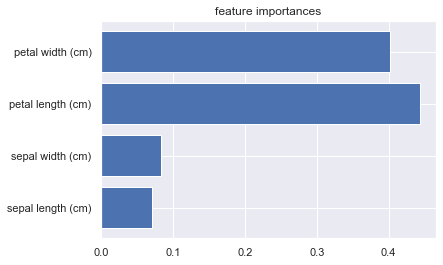

In [1]:
#重要度の確認
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns
sns.set()

# irisデータセットをロード
data = load_iris()

train_X = data['data']
train_y = data['target']
features = data['feature_names']
target_names = data['target_names']

# setosa, virginicaを同じラベルに変更
train_y = np.where((train_y == 0) | (train_y == 2), 0, 1)

rfc = RandomForestClassifier()

# 特徴量重要度を可視化
rfc.fit(train_X, train_y)
plt.barh(features, rfc.feature_importances_)
plt.title('feature importances')

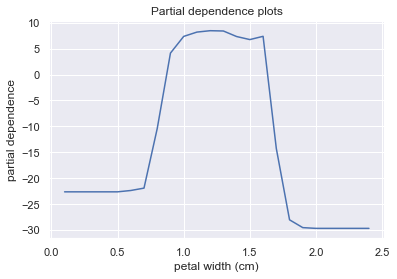

In [11]:
def pdp(model, df, feature, target=1):

    df_ = df.copy()
    x = list()
    y = list()
    # 対象の特徴量の最小値から最大値までに0.1刻みのシーケンスを作成
    seq_list = np.arange(np.min(df[feature]), np.max(df[feature]), 0.1)
    
    for seq in seq_list:
        # 対象の特徴量の値を書き換える
        df_.loc[:, feature] = seq        
        # クラス所属確率が0の場合にエラーになるためlog1pを使用
        pred_list = np.log1p(model.predict_proba(df_))
        
        sum_pred_prob = 0
        for pred in pred_list:

            # クラス所属確率の対数の和
            sum_log_prob = np.sum([pred[k] for k in range(len(pred))])/len(pred)
            sum_pred_prob += (pred[target] - sum_log_prob)
        
        x.append(seq)
        y.append(sum_pred_prob)
    
    plt.plot(x, y)
    plt.xlabel(feature)
    plt.ylabel('partial dependence')
    plt.title('Partial dependence plots')

df_train = pd.DataFrame(train_X, columns=features)

#petal_widthがクラス1の分類にどれだけ影響するか
pdp(rfc, df_train, 'petal width (cm)', target=1)